## Training a classification tree with sklearn

We'll start by working with the [Wisconsin Breast Cancer Dataset from the UCI machine learning repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) and predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (`radius_mean`) and its mean number of concave points (`concave points_mean`).

We'll start by creating a split into 80% train and 20% test. The feature matrices will be assigned to `X_train` and `X_test`, while the arrays of labels are assigned to `y_train` and `y_test` where class 0 corresponds to a benign tumor and class 1 corresponds to a malignant tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df_wbc = pd.read_csv('./data/wbc.csv')
print(df_wbc.shape)
print(df_wbc.columns)
df_wbc.head()

(569, 32)
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# convert target to binary values
df_wbc['diagnosis'] = df_wbc['diagnosis'].str.replace('M', '1')
df_wbc['diagnosis'] = df_wbc['diagnosis'].str.replace('B', '0')
df_wbc['diagnosis'] = df_wbc['diagnosis'].astype(int)

X = df_wbc.loc[:, ['radius_mean', 'concave points_mean']]
y = df_wbc['diagnosis']

In [3]:
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=SEED)

print(X_train.shape)
X_train.head()

(455, 2)


,radius_mean,concave points_mean
195,12.91,0.02377
560,14.05,0.04304
544,13.87,0.02369
495,14.87,0.04951
527,12.34,0.02647


In [4]:
# instantiate a DecisionTreeClassifier with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


## Evaluate the classification tree

Now that you've fit the tree model, it's time to evaluate its performance on the test set. We'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

In [5]:
from sklearn.metrics import accuracy_score

# predict test set labels
y_pred = dt.predict(X_test)

# compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {acc:.2f}")

Test set accuracy: 0.89


## Logistic regression vs classification tree

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces a single linear decision boundary dividing the feature space into decision regions.

The function `plot_labeled_decision_regions()` can be used to plot the decision regions of a list containing two trained classifiers.

We'll continue to use the `X_train`, `X_test`, `y_train`, `y_test`, and the model `dt` trained earlier.

In [6]:
# generator to cycle markers or colors
def cycle(item_seq):
    item_count = len(item_seq)
    i = 0
    while i < item_count:  # infinite loop, but this is a cyclical generator
        yield item_seq[i]
        i += 1
        i = i % item_count


In [7]:
from math import floor, ceil
from mlxtend.utils import check_Xy, format_kwarg_dictionaries


def plot_decision_regions(X, y, clf,
                          feature_index=None,
                          filler_feature_values=None,
                          filler_feature_ranges=None,
                          ax=None,
                          X_highlight=None,
                          zoom_factor=1.,
                          legend=1,
                          hide_spines=True,
                          markers='s^oxv<>',
                          colors=('#1f77b4,#ff7f0e,#3ca02c,#d62728,'
                                  '#9467bd,#8c564b,#e377c2,'
                                  '#7f7f7f,#bcbd22,#17becf'),
                          scatter_kwargs=None,
                          contourf_kwargs=None,
                          scatter_highlight_kwargs=None):
    """Plot decision regions of a classifier.

    Note that this functions assumes that class labels are labeled
    consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class labels
    with integer labels > 4, you may want to provide additional colors
    and/or markers as `colors` and `markers` arguments.
    See http://matplotlib.org/examples/color/named_colors.html for more
    information.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Feature Matrix.

    y : array-like, shape = [n_samples]
        True class labels.

    clf : Classifier object.
        Must have a .predict method.

    feature_index : array-like (default: (0,) for 1D, (0, 1) otherwise)
        Feature indices to use for plotting. The first index in
        `feature_index` will be on the x-axis, the second index will be
        on the y-axis.

    filler_feature_values : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted.

    filler_feature_ranges : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted. Will use the
        ranges provided to select training samples for plotting.

    ax : matplotlib.axes.Axes (default: None)
        An existing matplotlib Axes. Creates
        one if ax=None.

    X_highlight : array-like, shape = [n_samples, n_features] (default: None)
        An array with data points that are used to highlight samples in `X`.

    zoom_factor : float (default: 1.0)
        Controls the scale of the x- and y-axis of the decision plot.

    hide_spines : bool (default: True)
        Hide axis spines if True.

    legend : int (default: 1)
        Integer to specify the legend location.
        No legend if legend is 0.

    markers : str (default: 's^oxv<>')
        Scatterplot markers.

    colors : str (default: 'red,blue,limegreen,gray,cyan')
        Comma separated list of colors.

    scatter_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib scatter function.

    contourf_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib contourf function.

    scatter_highlight_kwargs : dict (default: None)
        Keyword arguments for underlying matplotlib scatter function.

    Returns
    ---------
    ax : matplotlib.axes.Axes object

    Examples
    -----------
    For usage examples, please see
    http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

    """

    check_Xy(X, y, y_int=True)  # Validate X and y arrays
    dim = X.shape[1]

    if ax is None:
        ax = plt.gca()

    plot_testdata = True
    if not isinstance(X_highlight, np.ndarray):
        if X_highlight is not None:
            raise ValueError('X_highlight must be a NumPy array or None')
        else:
            plot_testdata = False
    elif len(X_highlight.shape) < 2:
        raise ValueError('X_highlight must be a 2D array')

    if feature_index is not None:
        # Unpack and validate the feature_index values
        if dim == 1:
            raise ValueError(
                'feature_index requires more than one training feature')
        try:
            x_index, y_index = feature_index
        except ValueError:
            raise ValueError(
                'Unable to unpack feature_index. Make sure feature_index '
                'only has two dimensions.')
        try:
            X[:, x_index], X[:, y_index]
        except IndexError:
            raise IndexError(
                'feature_index values out of range. X.shape is {}, but '
                'feature_index is {}'.format(X.shape, feature_index))
    else:
        feature_index = (0, 1)
        x_index, y_index = feature_index

    # Extra input validation for higher number of training features
    if dim > 2:
        if filler_feature_values is None:
            raise ValueError('Filler values must be provided when '
                             'X has more than 2 training features.')

        if filler_feature_ranges is not None:
            if not set(filler_feature_values) == set(filler_feature_ranges):
                raise ValueError(
                    'filler_feature_values and filler_feature_ranges must '
                    'have the same keys')

        # Check that all columns in X are accounted for
        column_check = np.zeros(dim, dtype=bool)
        for idx in filler_feature_values:
            column_check[idx] = True
        for idx in feature_index:
            column_check[idx] = True
        if not all(column_check):
            missing_cols = np.argwhere(~column_check).flatten()
            raise ValueError(
                'Column(s) {} need to be accounted for in either '
                'feature_index or filler_feature_values'.format(missing_cols))

    marker_gen = cycle(list(markers))

    n_classes = np.unique(y).shape[0]
    colors = colors.split(',')
    colors_gen = cycle(colors)
    colors = [next(colors_gen) for c in range(n_classes)]

    # Get minimum and maximum
    x_min, x_max = (X[:, x_index].min() - 1./zoom_factor,
                    X[:, x_index].max() + 1./zoom_factor)
    if dim == 1:
        y_min, y_max = -1, 1
    else:
        y_min, y_max = (X[:, y_index].min() - 1./zoom_factor,
                        X[:, y_index].max() + 1./zoom_factor)

    xnum, ynum = plt.gcf().dpi * plt.gcf().get_size_inches()
    xnum, ynum = floor(xnum), ceil(ynum)
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=xnum),
                         np.linspace(y_min, y_max, num=ynum))

    if dim == 1:
        X_predict = np.array([xx.ravel()]).T
    else:
        X_grid = np.array([xx.ravel(), yy.ravel()]).T
        X_predict = np.zeros((X_grid.shape[0], dim))
        X_predict[:, x_index] = X_grid[:, 0]
        X_predict[:, y_index] = X_grid[:, 1]
        if dim > 2:
            for feature_idx in filler_feature_values:
                X_predict[:, feature_idx] = filler_feature_values[feature_idx]
    Z = clf.predict(X_predict.astype(X.dtype))
    Z = Z.reshape(xx.shape)
    # Plot decisoin region
    # Make sure contourf_kwargs has backwards compatible defaults
    contourf_kwargs_default = {'alpha': 0.45, 'antialiased': True}
    contourf_kwargs = format_kwarg_dictionaries(
                        default_kwargs=contourf_kwargs_default,
                        user_kwargs=contourf_kwargs,
                        protected_keys=['colors', 'levels'])
    cset = ax.contourf(xx, yy, Z,
                       colors=colors,
                       levels=np.arange(Z.max() + 2) - 0.5,
                       **contourf_kwargs)

    ax.contour(xx, yy, Z, cset.levels,
               colors='k',
               linewidths=0.5,
               antialiased=True)

    ax.axis([xx.min(), xx.max(), yy.min(), yy.max()])

    # Scatter training data samples
    # Make sure scatter_kwargs has backwards compatible defaults
    scatter_kwargs_default = {'alpha': 0.8, 'edgecolor': 'black'}
    scatter_kwargs = format_kwarg_dictionaries(
                        default_kwargs=scatter_kwargs_default,
                        user_kwargs=scatter_kwargs,
                        protected_keys=['c', 'marker', 'label'])
    for idx, c in enumerate(np.unique(y)):
        if dim == 1:
            y_data = [0 for i in X[y == c]]
            x_data = X[y == c]
        elif dim == 2:
            y_data = X[y == c, y_index]
            x_data = X[y == c, x_index]
        elif dim > 2 and filler_feature_ranges is not None:
            class_mask = y == c
            feature_range_mask = get_feature_range_mask(
                            X, filler_feature_values=filler_feature_values,
                            filler_feature_ranges=filler_feature_ranges)
            y_data = X[class_mask & feature_range_mask, y_index]
            x_data = X[class_mask & feature_range_mask, x_index]
        else:
            continue

        ax.scatter(x=x_data,
                   y=y_data,
                   c=colors[idx],
                   marker=next(marker_gen),
                   label=c,
                   **scatter_kwargs)

    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if dim == 1:
        ax.axes.get_yaxis().set_ticks([])

    if plot_testdata:
        if dim == 1:
            x_data = X_highlight
            y_data = [0 for i in X_highlight]
        elif dim == 2:
            x_data = X_highlight[:, x_index]
            y_data = X_highlight[:, y_index]
        else:
            feature_range_mask = get_feature_range_mask(
                    X_highlight, filler_feature_values=filler_feature_values,
                    filler_feature_ranges=filler_feature_ranges)
            y_data = X_highlight[feature_range_mask, y_index]
            x_data = X_highlight[feature_range_mask, x_index]

        # Make sure scatter_highlight_kwargs backwards compatible defaults
        scatter_highlight_defaults = {'c': 'none',
                                      'edgecolor': 'black',
                                      'alpha': 1.0,
                                      'linewidths': 1,
                                      'marker': 'o',
                                      's': 80}
        scatter_highlight_kwargs = format_kwarg_dictionaries(
                                    default_kwargs=scatter_highlight_defaults,
                                    user_kwargs=scatter_highlight_kwargs)
        ax.scatter(x_data,
                   y_data,
                   **scatter_highlight_kwargs)

    if legend:
        if dim > 2 and filler_feature_ranges is None:
            pass
        else:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels,
                      framealpha=0.3, scatterpoints=1, loc=legend)

    return ax

def plot_labeled_decision_regions(X, y, models):
    """Creates a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.

    Prerequisites: plot_decision_regions function
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers"""
    
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()


C:\VirtualEnvironments\datacamp\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\VirtualEnvironments\datacamp\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


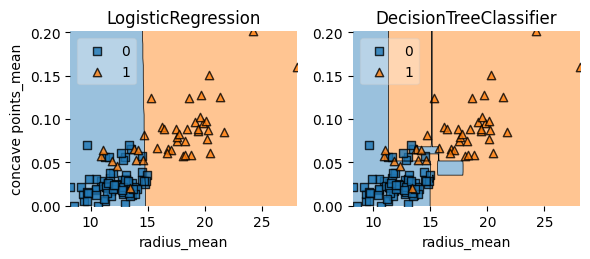

In [8]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

logreg = LogisticRegression(random_state=1)

# fit logistic regression model to the training set
logreg.fit(X_train, y_train)

# create a list of classifiers containing our two trained models
clfs = [logreg, dt]

# visualize the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

## Using entropy as training criterion

In this this section, we'll train a classification tree on the Wisconsin Breast Cancer dataset using **entropy** as an information criterion. We'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

The target is the `diagnosis` column which has been converted to binary values in the 2nd code cell above.

In [9]:
# use all features
X = df_wbc.drop('diagnosis', axis=1, inplace=False)  # everything but the target
y = df_wbc['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                   test_size=0.2,  
                                                   stratify=y, 
                                                   random_state=1)

In [10]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# predict test set labels
y_pred = dt_entropy.predict(X_test)

# evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

Accuracy achieved by using entropy: 0.939


## Using gini index as training criterion

In [11]:
# instantiate a dt using 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# fit to the training set
dt_gini.fit(X_train, y_train)

# predict test set labels
y_pred = dt_gini.predict(X_test)

# evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')

Accuracy achieved by using the gini index: 0.930


## Training a regression tree

Trees can also be used for regression, so in this section we'll train a regression tree to predict the **mpg** (miles per gallon) fuel consumption of cars in the auto-mpg dataset using the features: `displ`, `hp`, `weight`, `accel` and `size`.

We'll start by splitting the data into 80% train and 20% test sets. After that, we'll evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures measures how much the model's predictions differ from the actual values. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

df_cars = pd.read_csv('./data/auto.csv')
df_cars.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [13]:
X = df_cars.drop(['mpg', 'origin'], axis=1, inplace=False).values
y = df_cars['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                   test_size=0.2,
                                                   random_state=1)

In [14]:
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)

# fit model to the training set
dt.fit(X_train, y_train)

# calculate predictions on the test set
y_pred_dt = dt.predict(X_test)

# compute mse_dt
mse_dt = MSE(y_test, y_pred_dt)

# Compute rmse_dt
rmse_dt = mse_dt ** 0.5


## Linear regression vs regression tree

In this section, we'll compare the test set RMSE of a regression tree to that achieved by a linear regression model. We will instantiate a linear regression model lr and train it on the same dataset as the regression tree.

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# predict test set values
y_pred_lr = lr.predict(X_test)

# calculate mean square error for linear reg
mse_lr = MSE(y_test, y_pred_lr)

# calc root mean square error
rmse_lr = mse_lr ** 0.5

print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 3.93
Regression Tree test set RMSE: 4.27


## Bias-Variance Tradeoff

In this section, we'll diagnose the bias and variance problems of a regression tree. The regression tree we'll define in this section will be used to predict the **mpg** consumption of cars from the auto dataset using the 5 features described earlier.

We'll use the DecisionTreeRegressor class we already imported from sklearn.tree.

In [16]:
# for reproducibility
SEED = 1

# split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

## Evaluate the 10-fold CV error

In this section, we'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree that we instantiated in the previous section. The CV RMSE is a good approximation of the RMSE on unseen data.

**Note** that since cross_val_score has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

In [17]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = -cross_val_score(
                      dt, X_train, y_train, cv=10, 
                      scoring='neg_mean_squared_error',
                      n_jobs=-1
                  )

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(0.5)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


## Evaluate the training error

Next, we'll evaluate the training set RMSE achieved by the regression tree (`dt`) that we instantiated in the previous section. We'll continue using the `X_train` and `y_train` created in an earlier section.

Note that in scikit-learn, the MSE of a model can be computed as follows:

MSE_model = mean_squared_error(y_true, y_predicted)

where we use the function `mean_squared_error` from the `metrics` module and pass it the true labels `y_true` as a first argument, and the predicted labels from the model `y_predicted` as a second argument.

In [18]:
# mean_square_error imported as MSE in earlier cell

# fit tree model to the training set
dt.fit(X_train, y_train)

# predict training set values
y_pred_train = dt.predict(X_train)

# calc training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(0.5)

print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


## High bias or high variance?

In this section we'll diagnose whether the regression tree dt we trained above suffers from a bias or a variance problem.

The training set RMSE (RMSE_train) and the CV RMSE (RMSE_CV) achieved by dt were computed in previous sections. If the variable called `baseline_RMSE` corresponding to the root mean-squared error achieved by the regression-tree trained with the disp feature only is 5.1, this could serve as the baseline RMSE above which a model is considered to be underfitting and below which the model is considered 'good enough'.

Under this criteria, does the decision tree (dt) suffer from a high bias or a high variance problem?

RMSE_train = 5.15

RMSE_CV = 5.14

baseline_RMSE = 5.1

### Conclusion

The regression tree suffers from **high bias** because **RMSE_CV** and **RMSE_train** are both greater than **baseline_RMSE**.

## Creating an ensemble

In this section, we'll work with the [Indian Liver Patient Dataset](https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset) from the UCI Machine learning repository.

We'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

TODO import LogisticRegression, DecisionTreeClassifier, and KNeighborsClassifier, use KNN as the aliases for the later

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

# set for reproducibility
SEED=1
# build each model in the ensemble
lr = LogisticRegression(random_state=SEED)
knn = KNN(n_neighbors=27)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

## Evaluate individual classifiers

In this section we'll evaluate the performance of the models in the list of classifiers that we defined in the previous section. We'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

### Preprocessing the data

Some preprocessing was done offline on the data set. The numeric were standardized. All we'll need to do here is split the results into 70% train and 30% test. The features matrices `X_train` and `X_test`, as well as the arrays of labels `y_train` and `y_test` will be used to fit and then evaluate the ensemble respectively.

In [20]:
df_ilpd = pd.read_csv('./data/indian_liver_patient_preprocessed.csv')
print(df_ilpd.columns)
df_ilpd.drop('Unnamed: 0', axis=1, inplace=True)  # drop the row number column
df_ilpd.head()

Index(['Unnamed: 0', 'Age_std', 'Total_Bilirubin_std', 'Direct_Bilirubin_std',
       'Alkaline_Phosphotase_std', 'Alamine_Aminotransferase_std',
       'Aspartate_Aminotransferase_std', 'Total_Protiens_std', 'Albumin_std',
       'Albumin_and_Globulin_Ratio_std', 'Is_male_std', 'Liver_disease'],
      dtype='object')


,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [21]:
X = df_ilpd.drop('Liver_disease', axis=1, inplace=False)
y = df_ilpd['Liver_disease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=1
)

print(f"shape of X_train: {X_train.shape}, shape of X_test: {X_test.shape}, shape of y_train: {y_train.shape}, shape of y_test: {y_test.shape}")

shape of X_train: (405, 10), shape of X_test: (174, 10), shape of y_train: (405,), shape of y_test: (174,)


In [22]:
# iterate over the list of classifiers
for clf_name, clf in classifiers:    
 
    # fit model to the training set
    clf.fit(X_train, y_train)
    # predict target
    y_pred = clf.predict(X_test)
    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
    # evaluate model on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.678
K Nearest Neighbours : 0.626
Classification Tree : 0.678


## Better performance with a Voting Classifier?

Now, we'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting. As we see, ensembles don't always outperform the individual model.

In [23]:
from sklearn.ensemble import VotingClassifier

# instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# fit vc to the training set
vc.fit(X_train, y_train)

# evaluate the test set predictions
y_pred = vc.predict(X_test)

# calculate accuracy score - notice that it's a little better
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.661


## Define the bagging (boostrap aggregating) classifier

In this section we'll continue working with the [Indian Liver Patient Dataset](https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset) from the UCI machine learning repository (provide link) to predict whether a patient suffers from a liver disease using 10 features including `Albumin`, `age` and `gender`. This time, we'll use a Bagging Classifier.

In [24]:
from sklearn.ensemble import BaggingClassifier

# create a decision tree instance
dt = DecisionTreeClassifier(random_state=1)

# create a bootstrap classifier instance
bc = BaggingClassifier(estimator=dt, n_estimators=50, random_state=1)

## Evaluate Bagging performance

Now that we've instantiated a bagging classifier, it's time to train it and evaluate its test set accuracy.

We'll resplit the Indian Liver Patient dataset into 80% train and 20% test. We'll use the bagging classifier `bc` that we instantiated in the previous section as well as the function `accuracy_score()` from `sklearn.metrics`.

In [25]:
# resplit the data to 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)

In [26]:
# fit bc to the training set
bc.fit(X_train, y_train)

# predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 0.66


## Prepare the ground for Out-of-Bag (OOB) accuracy estimation

In this section, we'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, we can evaluate the OOB accuracy of an ensemble classifier by setting the parameter `oob_score` to `True` during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the `.oob_score_` attribute from the corresponding instance.

In [27]:
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

bc = BaggingClassifier(estimator=dt, 
                       n_estimators=50,
                       oob_score=True,
                       random_state=1)

## OOB Score vs Test Set Score

We can now fit the bagging classifier to the training set and evaluate its OOB accuracy.

In [28]:
# fit bc to the training set 
bc.fit(X_train, y_train)

# predict test set labels
y_pred = bc.predict(X_test)

# evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# evaluate OOB accuracy
acc_oob = bc.oob_score_

print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.698, OOB accuracy: 0.702


As we'd expect, these are very close which demostrates the appropriateness of using OOB as a good estimate for test set accuracy.

## Random Forest on auto data

We'll revisit the `auto.csv` data we read in earlier

In [31]:
from sklearn.ensemble import RandomForestRegressor 
# from sklearn.model_selection import train_test_split 
# from sklearn.metrics import mean_squared_error as MSE 
# reset seed for reproducibility 
SEED = 1 

X = df_cars.drop(['mpg', 'origin'], axis=1, inplace=False)
y = df_cars['mpg']

# split data into 70% train and 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    test_size=0.3, 
                                                    random_state=SEED) 
rf = RandomForestRegressor(n_estimators=400,
                           min_samples_leaf=0.12,
                           random_state=SEED)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse_test = MSE(y_test, y_pred)
print(f'Test set RMSE of rf: {rmse_test:.2f}')

Test set RMSE of rf: 15.83


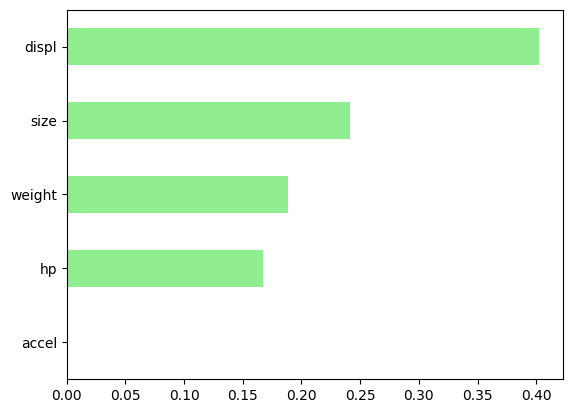

In [32]:
# import pandas as pd 
# import matplotlib.pyplot as plt 
# Create a pd.Series of features importances 
importances_rf = pd.Series(rf.feature_importances_, index = X.columns) 
# Sort importances_rf                                    
sorted_importances_rf = importances_rf.sort_values()    
# Make a horizontal bar plot 
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show() 

## Train an RF regressor

In the following section, we'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the [Bike Sharing Demand dataset available through Kaggle](https://www.kaggle.com/c/bike-sharing-demand). We'll be using the random forests algorithm.

The first step will be to split the data into 80% train and 20% test. Then we'll define a random forests regressor, fit it to the training set and evaluate the results.


In [36]:
df_bikes = pd.read_csv('./data/bikes.csv')
print(df_bikes.shape)
df_bikes.head()

(1488, 13)


,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [ ]:
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)
            
# fit rf to the training set    
rf.fit(X_train, y_train)

In [ ]:
# Predict the test set labels
y_pred = rf.predict(X_test)

# evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** 0.5

print('Test set RMSE of rf: {:.2f}'.format(rmse_test))  # Test set RMSE of rf: 2689.33

In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()